In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
coffee_df=pd.read_csv(r'D:\AU(DS)\python\coffe\total-production.csv')
coffee_df.columns=coffee_df.iloc[0]
coffee_df.head()

,Angola,50.345,79.331,77.52,32.608,76.802,62.109,70.925,64.33,85.344,...,13.42,34.97,28.715,32.79,34.935,39.405,40.515,44.83,35.006,40.3874
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [7]:
coffee_df=coffee_df.drop("total_production")
coffee_df.index

KeyError: "['total_production'] not found in axis"

In [ ]:
coffee_df.sum()

In [ ]:
#coffee_df[['Angola','Brazil']].sum()
top_10_producer=coffee_df.sum().sort_values(ascending=False).iloc[0:10]
top_10_producer

In [ ]:
# Plottiing bar graph for above
fig,ax=plt.subplots()
ax.bar(top_10_producer.index,top_10_producer/1000000,color='cyan')
position=list(range(10))
labels=['BZ','VN','CL','INDO','ETh','IND','MEX','GUT','HON','UG']
ax.set_xticks(position)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.xticks(rotation=45);

In [ ]:
# ploting line chart for to 5 producers
top_5=coffee_df.loc[:,['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia']]
top_5.index.astype('datetime64[ns]')
top_5.head()

In [ ]:
fig,ax=plt.subplots()
ax.plot(top_5.index,top_5['Brazil'],color='red')
ax.plot(top_5.index,top_5['Viet Nam'],color='black')
ax.plot(top_5.index,top_5['Colombia'],color='green')


plt.xticks(rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig .suptitle('Coffee Producing Nation 1990 to 2012');


In [ ]:
brazil_vs_other=coffee_df
#brazil_vs_other.head(5)
brazil_vs_other=brazil_vs_other.assign(rest_of_world=brazil_vs_other.drop('Brazil',axis=1).sum(axis=1)).loc[:,['Brazil','rest_of_world']]
brazil_vs_other=brazil_vs_other.astype({'Brazil':'float64','rest_of_world':'float64'})


In [ ]:
brazil_vs_other.head()

In [ ]:
fig,ax=plt.subplots()
ax.stackplot(brazil_vs_other.index.astype('datetime64[ns]'),
             brazil_vs_other['Brazil'],
             brazil_vs_other['rest_of_world'],
            labels=['Brazil','rest_of_world'])
fig.suptitle('Brazil vs Other ')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper left')

In [ ]:
# coffee prodfuction
coffee_df.head()
fig,ax=plt.subplots()
ax.scatter(coffee_df['Brazil'],coffee_df['Angola'])
fig.suptitle('Brazil Production Vs Angola')

In [ ]:
# comaprig top 5 producers with  rest of world
top_5_rest=coffee_df.copy()
top_5_rest['rest_of_world']=top_5_rest.drop(['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia'],axis=1).sum(axis=1)
top_5_rest
top_5_2018=top_5_rest.loc['2018',['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia','rest_of_world']]

In [ ]:
top_5_2018
fig,ax=plt.subplots()
ax.pie(top_5_2018,
      autopct="%.0f%%",
      labels=top_5_2018.index);

In [ ]:
# relation between import and  consumption
import_df=pd.read_csv('imports.csv')
#import_df.head()
import_df=import_df.set_index('imports').mean(axis=1)
import_df.head()

In [3]:
retail_df=pd.read_csv('retail-prices.csv')
retail_df=retail_df.set_index('retail_prices').mean(axis=1)
retail_df

FileNotFoundError: [Errno 2] No such file or directory: 'retail-prices.csv'

In [ ]:
# merging both table
price_cons=pd.DataFrame(retail_df).merge(pd.DataFrame(import_df),
                                        left_on=retail_df.index,
                                        right_on=import_df.index,
                                        how='inner',
                                        )

price_cons.columns=['country','price','consumption']
price_cons

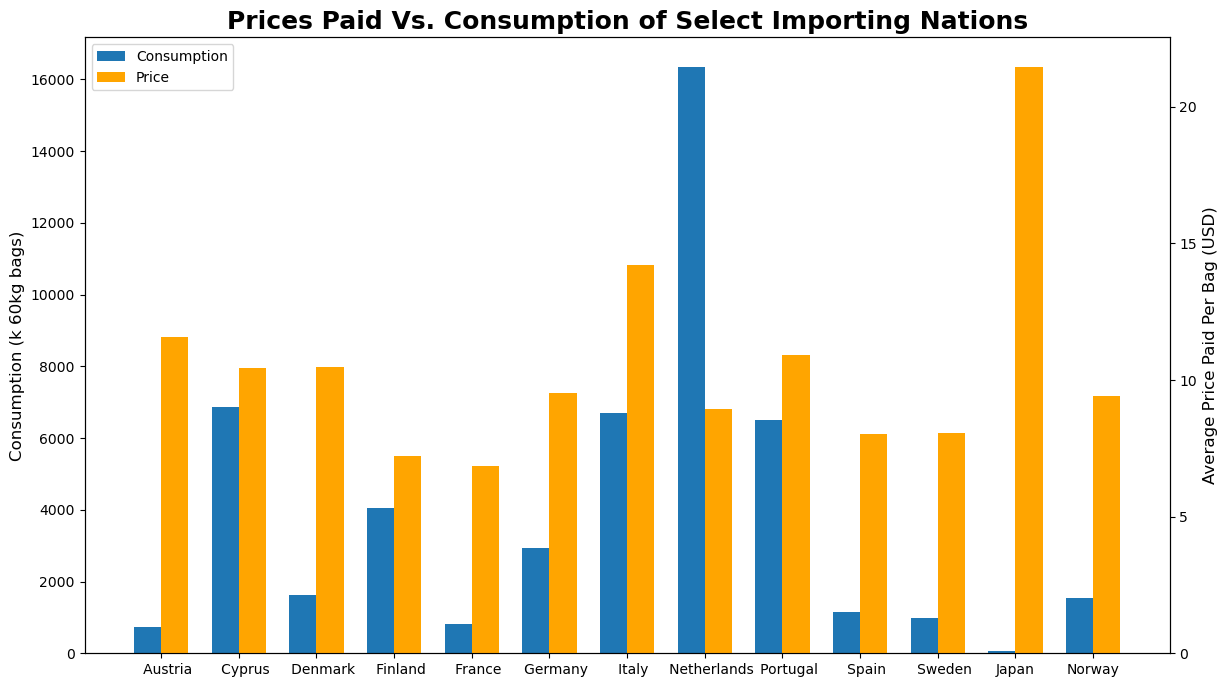

In [131]:
fig, ax = plt.subplots(figsize=(14, 8))

width=.35
x=np.arange(0, len(price_cons["country"]))

bar1 = ax.bar(x-width/2, price_cons["consumption"][::-1], width=width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)


ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons["price"], width=width, color="orange")
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"],loc='upper left')

plt.show()